In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
import tensorflow as tf 
import os
print(os.listdir("../desktop"))

['Screen Shot 2021-02-14 at 12.12.41 PM.png', 'Screen Shot 2021-02-18 at 4.02.27 PM.png', 'Screen Shot 2021-06-09 at 1.14.23 AM.png', 'housing.csv', 'housepricedata.csv', 'Classification Practice.ipynb', 'Salary_Data.csv', 't10k-images-idx3-ubyte', 'Untitled1.ipynb', 'lab10_1.cpp', 'House Price Predictions .ipynb', '.DS_Store', 'Screen Shot 2021-05-12 at 12.40.06 PM.png', 'Screen Shot 2021-04-21 at 11.33.54 PM.png', 'Screen Shot 2021-02-17 at 5.29.41 PM.png', 'Screen Shot 2021-05-03 at 11.20.03 PM.png', 'archive', 'Screen Shot 2021-05-12 at 11.42.29 AM.png', 'Screen Shot 2021-05-12 at 12.56.31 PM.png', '.localized', 'Relocated Items.nosync', 'Screen Shot 2021-06-21 at 10.06.51 AM.png', 'Untitled.ipynb', 'Screen Shot 2021-04-24 at 1.07.52 PM.png', 'Screen Shot 2021-04-22 at 10.12.20 AM.png', 'Screen Shot 2021-06-29 at 10.56.46 PM.png', 'Screen Shot 2021-04-23 at 2.41.51 AM.png', 'Screen Shot 2021-02-18 at 4.02.19 PM.png', 't10k-labels-idx1-ubyte', 'Untitled2.ipynb', 'Screen Shot 2021-04

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0
print("x_train.shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

x_train.shape:  (60000, 28, 28)
x_test shape:  (10000, 28, 28)


In [4]:
# label encoding
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 10)

In [5]:
# split the train and validation set for the fitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)
print("x_train shape", x_train.shape)
print("x_test shape", x_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

x_train shape (48000, 28, 28)
x_test shape (12000, 28, 28)
y_train shape (48000, 10)
y_test shape (12000, 10)


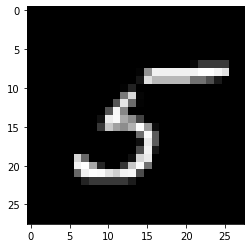

In [6]:
plt.imshow(x_train[2][:,:],cmap='gray')
plt.show()

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [8]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [9]:
print("x_train.shape", x_train.shape)
print("x_test.shape", x_test.shape)

x_train.shape (48000, 28, 28, 1)
x_test.shape (12000, 28, 28, 1)


In [10]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(300, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               405900    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 408,990
Trainable params: 408,990
Non-trainable params: 0
__________________________________________________

In [12]:
opd = tf.keras.optimizers.Adam(
    learning_rate=0.001)

In [13]:
model.compile(optimizer = opd, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [14]:
hist = model.fit(x_train, y_train, batch_size = 28, epochs = 125, validation_data=(x_test, y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/125
48000/48000 [==============================] - 25s 513us/sample - loss: 0.2076 - accuracy: 0.9389 - val_loss: 0.0777 - val_accuracy: 0.9766
Epoch 2/125
48000/48000 [==============================] - 24s 494us/sample - loss: 0.0778 - accuracy: 0.9769 - val_loss: 0.0560 - val_accuracy: 0.9818
Epoch 3/125
48000/48000 [==============================] - 24s 491us/sample - loss: 0.0535 - accuracy: 0.9835 - val_loss: 0.0506 - val_accuracy: 0.9848
Epoch 4/125
48000/48000 [==============================] - 24s 490us/sample - loss: 0.0392 - accuracy: 0.9877 - val_loss: 0.0473 - val_accuracy: 0.9850
Epoch 5/125
48000/48000 [==============================] - 26s 546us/sample - loss: 0.0294 - accuracy: 0.9907 - val_loss: 0.0491 - val_accuracy: 0.9860
Epoch 6/125
48000/48000 [==============================] - 879s 18ms/sample - loss: 0.0254 - accuracy: 0.9916 - val_loss: 0.0441 - val_accuracy: 0.9877
Epoch 7/125
48000/48000 [=============

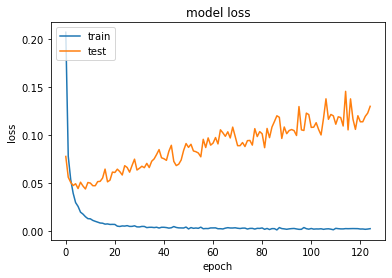

In [16]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()